In [343]:
import pandas as pd

df = pd.read_csv('train.csv').drop('id', axis=1)
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


In [344]:
df.describe()

,price
count,5.163500e+04
mean,4.532253e+05
std,1.793287e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.600000e+05
max,1.000000e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x1d494abd730>,
 'caps': [<matplotlib.lines.Line2D at 0x1d494abce00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d494abeba0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d494abc4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d494abe120>],
 'means': []}

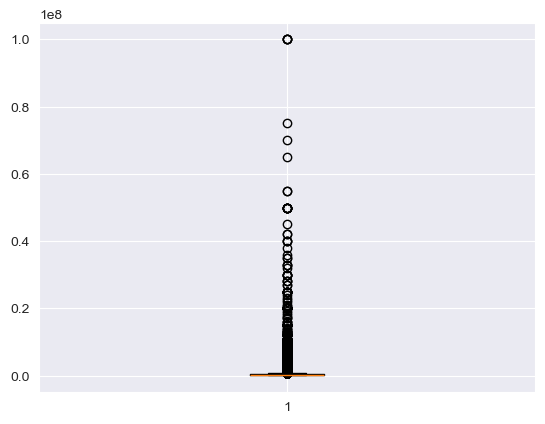

In [345]:
from matplotlib import pyplot as plt

plt.boxplot(df['price'])

In [346]:
df['plate_length'] = df['plate'].str.len()

In [347]:
df['plate_length'].value_counts()

plate_length
9    36195
8    15440
Name: count, dtype: int64

In [348]:
df.groupby('plate_length').describe().T

plate_length             8             9
price count   1.544000e+04  3.619500e+04
      mean    8.006511e+05  3.050210e+05
      std     2.813470e+06  1.066669e+06
      min     2.000000e+04  2.000000e+04
      25%     1.200000e+05  6.500000e+04
      50%     2.900000e+05  1.300000e+05
      75%     6.000000e+05  2.900000e+05
      max     1.000000e+08  1.000000e+08

In [349]:
# Split region and registration code from the plate

df['region'] = df['plate'].apply(lambda x: int(x[-2:]) if len(x) == 8 else int(x[-3:]))
df['registration_code'] = df['plate'].apply(lambda x: int(x[1:4]))
df['digit_1'] = df['plate'].apply(lambda x: x[0])
df['digit_2'] = df['plate'].apply(lambda x: x[4])
df['digit_3'] = df['plate'].apply(lambda x: x[5])

In [350]:
df

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3
0,X059CP797,2024-12-26 00:00:00,65000,9,797,59,X,C,P
1,Y800MH790,2024-07-12 21:31:37,100000,9,790,800,Y,M,H
2,A212TX77,2024-04-18 00:00:00,290000,8,77,212,A,T,X
3,P001AY199,2025-01-03 00:27:15,680000,9,199,1,P,A,Y
4,P001AY199,2025-01-10 09:32:41,750000,9,199,1,P,A,Y
...,...,...,...,...,...,...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000,9,797,23,X,P,P
51631,M004KA161,2025-01-31 00:00:00,1600000,9,161,4,M,K,A
51632,E888EB199,2025-02-06 00:00:00,850000,9,199,888,E,E,B
51633,X023XK77,2024-04-24 11:30:07,150000,8,77,23,X,X,K


In [351]:
# Expensive plates
df[df['price'] > 100000000 * 0.50]

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3
1794,K252KK777,2024-10-14 00:00:00,100000000,9,777,252,K,K,K
14331,A777YX77,2024-01-25 16:37:41,65000000,8,77,777,A,Y,X
14334,A777YX77,2024-06-12 13:30:08,55000000,8,77,777,A,Y,X
21108,M026MM08,2024-03-30 00:00:00,100000000,8,8,26,M,M,M
22175,B888OP88,2024-06-15 00:00:00,55000500,8,88,888,B,O,P
41264,O039CA39,2024-07-02 00:00:00,75000000,8,39,39,O,C,A
43878,B777CY77,2024-08-02 00:00:00,100000000,8,77,777,B,C,Y
47081,X777XX05,2024-06-24 00:00:00,100000000,8,5,777,X,X,X
47086,Y293TY193,2024-02-10 00:00:00,70000000,9,193,293,Y,T,Y


In [352]:
# get the mean price for each duplicate plate
df['price'] = df.groupby('plate')['price'].transform('mean')
df = df.drop_duplicates(subset='plate').reset_index(drop=True)
df.describe()

,price,plate_length,region,registration_code
count,4.360500e+04,43605.000000,43605.000000,43605.000000
mean,4.370113e+05,8.695723,421.213737,415.663846
std,1.819148e+06,0.460106,344.084200,329.137070
min,2.000000e+04,8.000000,1.000000,1.000000
25%,7.000000e+04,8.000000,93.000000,90.000000
50%,1.500000e+05,9.000000,198.000000,386.000000
75%,3.500000e+05,9.000000,790.000000,717.000000
max,1.000000e+08,9.000000,977.000000,999.000000


In [353]:
df.head()

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B


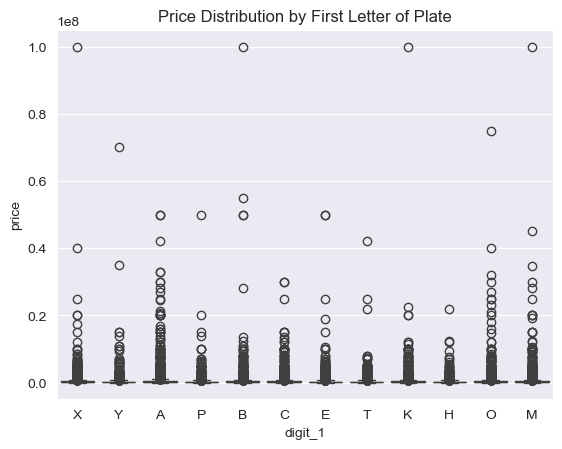

In [354]:
# findout whether the first letter is important or not 

# df.groupby('digit_1').describe()['price']


import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='digit_1', y='price', data=df)
plt.title('Price Distribution by First Letter of Plate')
plt.show()

In [355]:
import pandas as pd
import scipy.stats as stats

groups = [group["price"].values for _, group in df.groupby("digit_1")]

h_stat, p_value = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 411.47589729490534, p-value: 2.237479124003958e-81


In [356]:
def count_consecutive_equal_digits(number):
    str_num = str(number)
    max_count = 1
    current_count = 1
    
    for i in range(1, len(str_num)):
        if str_num[i] == str_num[i - 1]:
            current_count += 1
        else:
            current_count = 1
        
        max_count = max(max_count, current_count)
    
    return max_count

In [357]:
df['registration_consecutive_count'] = df['plate'].apply(lambda x: count_consecutive_equal_digits(x[1:4]))
df.head()

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2


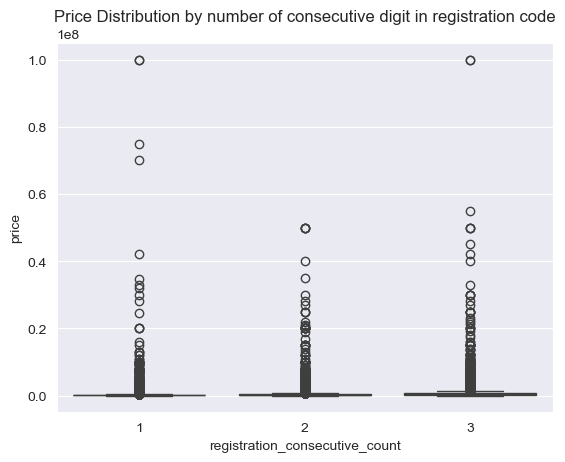

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='registration_consecutive_count', y='price', data=df)
plt.title('Price Distribution by number of consecutive digit in registration code')
plt.show()

In [359]:
from scipy.stats import kruskal


groups = [group["price"].values for _, group in df.groupby("registration_consecutive_count")]

h_stat, p_value = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 9593.931117043503, p-value: 0.0


In [360]:
df.groupby("registration_consecutive_count").describe()['price'].T

registration_consecutive_count,1,2,3
count,2.276000e+04,1.422600e+04,6.619000e+03
mean,2.699012e+05,4.405302e+05,1.004071e+06
std,1.445534e+06,1.488613e+06,3.072016e+06
min,2.000000e+04,2.000000e+04,2.400000e+04
25%,5.000000e+04,1.000000e+05,2.500000e+05
50%,9.000000e+04,1.800000e+05,4.000000e+05
75%,2.000000e+05,3.500000e+05,7.550000e+05
max,1.000000e+08,5.000000e+07,1.000000e+08


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43605 entries, 0 to 43604
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   plate                           43605 non-null  object 
 1   date                            43605 non-null  object 
 2   price                           43605 non-null  float64
 3   plate_length                    43605 non-null  int64  
 4   region                          43605 non-null  int64  
 5   registration_code               43605 non-null  int64  
 6   digit_1                         43605 non-null  object 
 7   digit_2                         43605 non-null  object 
 8   digit_3                         43605 non-null  object 
 9   registration_consecutive_count  43605 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.3+ MB


<Axes: >

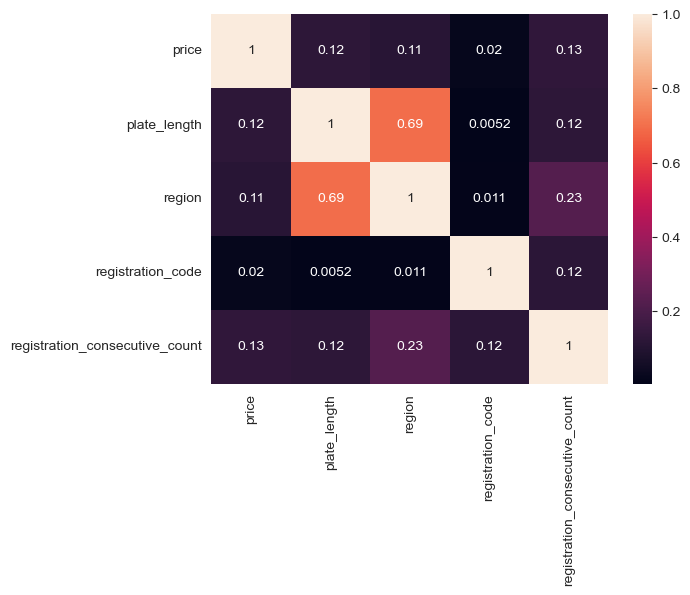

In [362]:
import seaborn as sns
import numpy as np

corr = df.select_dtypes(['int64', 'float64']).corr().apply(np.abs)
sns.heatmap(corr, annot=True)

<Axes: >

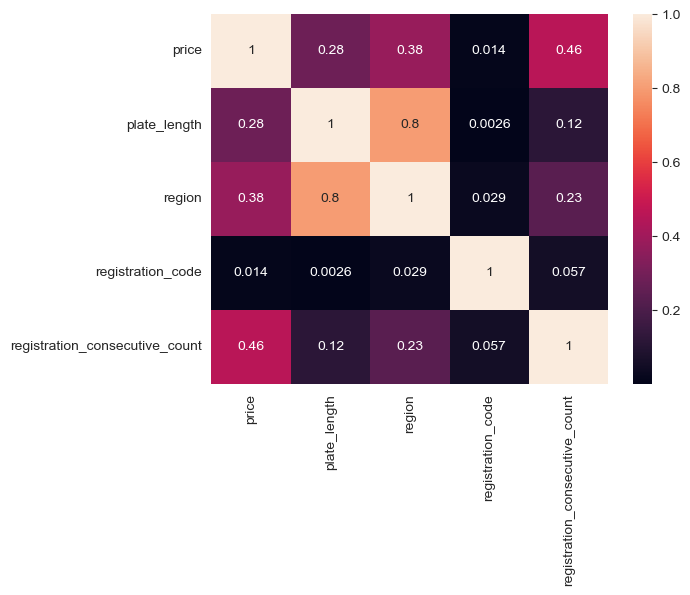

In [363]:
import seaborn as sns
import numpy as np

corr = df.select_dtypes(['int64', 'float64']).corr(method='spearman').apply(np.abs)
sns.heatmap(corr, annot=True)

as we see we have more monotonic correlation instead of linear.

## Encoding

In [364]:
unique_letters = set(''.join(df['plate'].str.extractall('([A-Z])')[0].tolist()))

letters = sorted(unique_letters)
letters

['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']

In [365]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the positional columns
encoded_features = encoder.fit_transform(df[['digit_1', 'digit_2', 'digit_3']])

# Create a DataFrame with the encoded features and proper column names
encoded_df = pd.DataFrame(encoded_features, 
                          columns=encoder.get_feature_names_out(['digit_1', 'digit_2', 'digit_3']))

# Concatenate the encoded features with the original DataFrame (optional)
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_C,digit_3_E,digit_3_H,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
def count_same_middle_digits(plate):
    middle_digits = plate[1:4] 
    return sum(middle_digits.count(d) for d in set(middle_digits) if middle_digits.count(d) > 1)

df_encoded['same_middle_digits_count'] = df_encoded['plate'].apply(count_same_middle_digits)


In [367]:
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_E,digit_3_H,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_middle_digits_count
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [368]:
def count_last_digits(plate):
    middle_digits = plate[4:] 
    return sum(middle_digits.count(d) for d in set(middle_digits) if middle_digits.count(d) > 1)

df_encoded['same_last_digits_count'] = df_encoded['plate'].apply(count_last_digits)

In [369]:
df_encoded['same_digits_count'] = df_encoded['same_middle_digits_count']+df_encoded['same_last_digits_count']
    

In [370]:
df_encoded.drop(['same_middle_digits_count', 'same_last_digits_count'], axis=1, inplace=True)

In [371]:
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_E,digit_3_H,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [372]:
def has_two_same_middle_digits(plate):
    middle_digits = plate[4:]  
    if len(set(middle_digits)) < 3:
        return 1
    else:
        return 0  
    
def has_three_same_middle_digits(plate):
    middle_digits = plate[4:]  
    if len(set(middle_digits)) < 2:
        return 1
    else:
        return 0

In [373]:
df_encoded["two_middle_same_number"] = df_encoded["plate"].apply(has_two_same_middle_digits)
df_encoded["three_middle_same_number"] = df_encoded["plate"].apply(has_three_same_middle_digits)
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,two_middle_same_number,three_middle_same_number
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0,0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0


In [374]:
def has_two_same_last_digits(plate):
    last_digits = plate[6:]  # Extract last digits
    if len(last_digits) == 2:  # If only two digits exist, check if they are the same
        return 1 if last_digits[0] == last_digits[1] else 0
    elif len(last_digits) == 3:  # If three digits exist, check if at least two match
        return 1 if len(set(last_digits)) < 3 else 0
    return 0  # Default case if something unexpected happens

def has_three_same_last_digits(plate):
    last_digits = plate[6:]  # Extract last digits
    if len(last_digits) < 3:  # If fewer than three digits, it's impossible to have three same
        return 0
    return 1 if len(set(last_digits)) == 1 else 0  # Check if all three digits are the same


In [375]:
df_encoded["two_last_same_number"] = df_encoded["plate"].apply(has_two_same_last_digits)
df_encoded["three_last_same_number"] = df_encoded["plate"].apply(has_three_same_last_digits)
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,two_middle_same_number,three_middle_same_number,two_last_same_number,three_last_same_number
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,1.0,0.0,0.0,0.0,2,0,0,1,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,1.0,0.0,4,0,0,1,0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,1.0,4,0,0,1,0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,1.0,0.0,0.0,0.0,4,0,0,1,0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,4,0,0,1,0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,5,0,0,1,0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,0.0,0.0,0.0,2,0,0,1,0


In [376]:
def has_two_same_word(plate):
    middle_digits = plate[4:6]  
    if len(set(middle_digits)) < 2:
        return 1
    else:
        return 0

In [377]:
df_encoded["two same word"] = df_encoded["plate"].apply(has_two_same_word)

In [378]:
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,two_middle_same_number,three_middle_same_number,two_last_same_number,three_last_same_number,two same word
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,1.0,0.0,0.0,0.0,2,0,0,1,0,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,2,0,0,0,0,0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,1.0,0.0,4,0,0,1,0,0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,1.0,4,0,0,1,0,0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,1.0,0.0,0.0,0.0,4,0,0,1,0,1
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,4,0,0,1,0,0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,5,0,0,1,0,0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,0.0,0.0,2,0,0,1,0,0
